d. Identify 5 common trends/myths/observations for the dataset which directly or 
indirectly co-relate one column in the dataset with another column of the dataset. 

### Hypothesis 1: Companies with more LinkedIn followers have higher number of employees


In [1]:
!pip install pandas

In [23]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
from sqlalchemy import create_engine

# database connection details
db_type = 'postgresql'  
username = 'postgres'
password = 'abc123'
host = 'localhost'
port = '5432'  
database = 'DataEngineering'

# Create the connection string
connection_string = f'{db_type}://{username}:{password}@{host}:{port}/{database}'

# Create the SQLAlchemy engine
engine = create_engine(connection_string)

def fetch_table_data(engine, table_name):
    query = f'SELECT * FROM "{table_name}"'
    try:
        df = pd.read_sql_query(query, engine)
        return df
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

In [37]:
# Fetch data from Companies table
table_name = 'Companies'  
df_Companies = fetch_table_data(engine, table_name)

if df_Companies is not None:
    display(df_Companies)
else:
    print("No data returned.")

,Company_id,Company,Class,Linkedin_Followers,Employee_Count,Industry
0,1,Genpact,Class 1,2519518,10001,IT Services and IT Consulting
1,2,Infosys,Class 3,6790011,10001,IT Services and IT Consulting
2,3,UST,Class 1,783349,10001,IT Services and IT Consulting
3,4,IDESLABS PRIVATE LIMITED,Class 4,80865,1200,IT Services and IT Consulting
4,5,Wipro,Class 3,6737300,10001,IT Services and IT Consulting
5,6,LTIMindtree,Class 1,270280,10001,IT Services and IT Consulting
6,7,Tata Consultancy Services,Class 3,11996967,10001,IT Services and IT Consulting
7,8,Uplers,Class 2,793022,5000,IT Services and IT Consulting
8,9,Vodafone Idea Limited,Class 1,235117,10001,Telecommunications
9,10,ACURA SOLUTIONS LTD,Class 4,11245,110,Real Estate


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

## Hypothesis 1: Companies with more LinkedIn followers have higher number of employees.
### To test the hypothesis "Companies with more LinkedIn followers have a higher number of employees," we can perform a simple correlation analysis between the "Linkedin_Followers" and "Employee_Count" columns. Correlation analysis helps to determine whether there is a linear relationship between two variables.

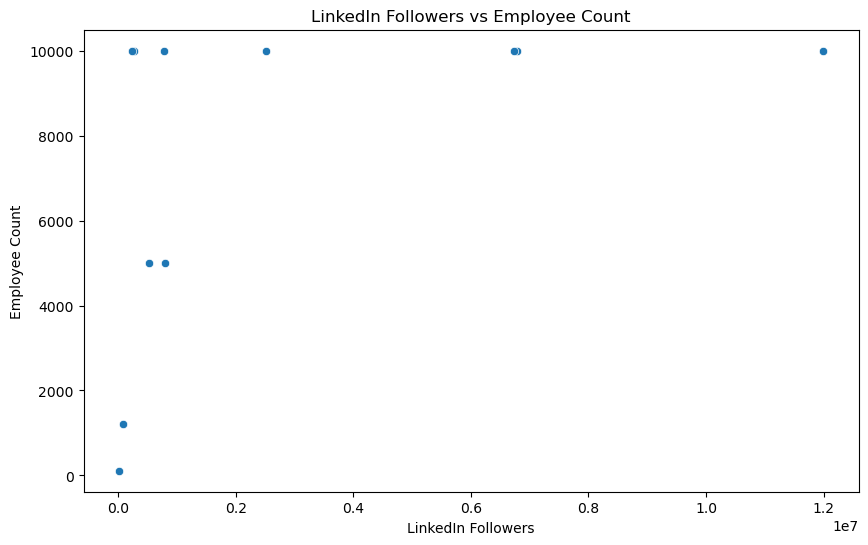

Correlation coefficient: 0.47271407042942537


In [38]:
# Let's create a plot
if df_Companies is not None:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Linkedin_Followers', y='Employee_Count', data=df)
    plt.title('LinkedIn Followers vs Employee Count')
    plt.xlabel('LinkedIn Followers')
    plt.ylabel('Employee Count')
    plt.show()

    # Calculate and print the correlation coefficient
    correlation = df['Linkedin_Followers'].corr(df['Employee_Count'])
    print(f'Correlation coefficient: {correlation}')
else:
    print("No data returned.")


### Interpreting the Correlation Coefficient:
#### A correlation coefficient close to 1 implies a strong positive relationship.
#### A correlation coefficient close to -1 implies a strong negative relationship.
#### A correlation coefficient around 0 implies no linear relationship.

### In the above Linkedin Flowers vs Employees, Correlation Coefficient is 0.47271407042942537, therefore there is not any relationship.

### # Prooving the result with other M/L Models
1. k-Nearest Neighbors, 2. Random Forest, and 3.XGBoost

In [34]:
pip install pandas scikit-learn xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 648.1 kB/s eta 0:03:13
   ---------------------------------------- 0.3/124.9 MB 2.4 MB/s eta 0:00:53
   ---------------------------------------- 0.6/124.9 MB 3.6 MB/s eta 0:00:35
   ---------------------------------------- 0.9/124.9 MB 4.6 MB/s eta 0:00:28
   ---------------------------------------- 1.3/124.9 MB 5.1 MB/s eta 0:00:25
    --------------------------------------- 1.6/124.9 MB 5.2 MB/s eta 0:00:24
    --------------------------------------- 2.0/124.9 MB 5.5 MB/s eta 0:00:23
    --------------------------------------- 2.4/124.9 MB 5.8 MB/s eta 0:00:22
    --------------------------------------- 2.7/124.9 MB 6.0 MB/s eta 0:00:21
    --------------------------------------- 3.0/124.9 MB 6.0 MB/s eta 0:00:21
   - -------------------------------------- 3.3/124.9 MB 6.2 MB/s eta 0:00:

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [45]:
# Data set preparation
X = df_Companies[['Linkedin_Followers']].values # should be in Numeric
y = df_Companies[['Employee_Count']].values   # should be in numeric

# Train and Test Spliting
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print("X_train: ",X_train)
print("X_test: " , X_test)
print("y_train: ",y_train)
print("y_test: " , y_test)

X_train:  [[  531551]
 [  783349]
 [ 6790011]
 [  235117]
 [ 6737300]
 [  793022]
 [   80865]
 [11996967]]
X_test:  [[ 270280]
 [2519518]
 [  11245]]
y_train:  [[ 5000]
 [10001]
 [10001]
 [10001]
 [10001]
 [ 5000]
 [ 1200]
 [10001]]
y_test:  [[10001]
 [10001]
 [  110]]


In [46]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Applying the Machine Learning Models 
### 1. k-Nearest Neighbors (k-NN)

In [49]:
#knn Model
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate k-NN
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f'k-NN Mean Squared Error: {mse_knn:.2f}')
print(f'k-NN R^2 Score: {r2_knn:.2f}')

k-NN Mean Squared Error: 20089772.19
k-NN R^2 Score: 0.08


### 2. Random Forest

In [50]:
# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf:.2f}')
print(f'Random Forest R^2 Score: {r2_rf:.2f}')


Random Forest Mean Squared Error: 12865696.46
Random Forest R^2 Score: 0.41


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12160\1411314112.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


### 3. XGBoost

In [51]:
# XGBoost Model
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluate XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost Mean Squared Error: {mse_xgb:.2f}')
print(f'XGBoost R^2 Score: {r2_xgb:.2f}')


XGBoost Mean Squared Error: 8732694.18
XGBoost R^2 Score: 0.60


### Interpretation
#### Mean Squared Error (MSE): Lower values indicate a better fit.
#### R-squared (R²) Score: Values closer to 1 indicate a better fit.

### According to above results, there is no any corrilation between those Linked Followers vs Employees in the Company fields
### Therefore Hypothesis 1 is False